# Yelp_Data_Challenge - NLP

## Main tasks
1. Load the dataset
2. Define feature variables
3. Define target variable
4. Create train and test dataset
5. Get NLP representation of the documents
6. Similar review search engine
    - 6.1 Summary on the search engine
7. Classifying positive/negative review
    - 7.1 KNN
    - 7.2 Naive-Bayes Classifier
    - 7.3 Logistic Regression Classifier
        - 7.3.1 What are the key features (words) that make the positive prediction?
        - 7.3.2 Summary
        - 7.3.3 What are the key features (words) that make the negative prediction?
        - 7.3.4 Summary
    - 7.4 Random Forest Classifier
        - 7.4.1 What features (words) are important by inspecting the RFC model?
    - 7.5 Model Comparison
8. Use cross validation to evaluate classifiers
    - 8.1 KNN
    - 8.2 Naive-Bayes Classifier
    - 8.3 Logistic Regression Classifier
    - 8.4 Random Forest Classifier
    - 8.5 Model Comparison    
9. Use grid search to find the best predictable classifier
    - 9.1 Grid search - KNN
    - 9.2 Grid search - Naive Bayes
    - 9.3 Grid search - Logistic Regression
    - 9.4 Grid search - Random Forest
    - 9.5 Model comparison
10. Use PCA to reduce dimensionality
    - 10.1 Stardardize features
    - 10.2 Use PCA to transform data (train and test) and get princial components
    - 10.3 See how much (and how much percentage of) variance the principal components explain
    - 10.4 Plot proportion of variance explained with top K principal components
11. Classifying positive/negative review with PCA preprocessing
    - 11.1 KNN
        - 11.1.1 Use standardized tf-idf vectors as features
        - 11.1.2 Use (Stardardized + PCA) tf-idf vectors as features
        - 11.2 Logistic Regression Classifier
        - 11.2.1 Use standardized tf-idf vectors as features
        - 11.2.2 Use (Stardardized + PCA) tf-idf vectors as features
        - 11.2.3 Visualization: PCA components 
    - 11.3 Random Forest Classifier
        - 11.3.1 Use standardized tf-idf vectors as features
        - 11.3.2 Use (Stardardized + PCA) tf-idf vectors as features
        - 11.3.3 Visualization: PCA components
    - 11.4 Model comparison

## 1. Load the dataset 

In [51]:
import pandas as pd
import numpy as np

In [52]:
df = pd.read_csv('dataset/last_2_years_restaurant_reviews.csv')

In [53]:
df.head(2)

,name,categories,avg_stars,cool,date,funny,review_id,stars,text,useful,user_id
0,Delmonico Steakhouse,"['Cajun/Creole', 'Steakhouses', 'Restaurants']",4.0,0,2016-03-31,0,6SgvNWJltnZhW7duJgZ42w,5,This is mine and my fiancé's favorite steakhou...,0,oFyOUOeGTRZhFPF9uTqrTQ
1,Delmonico Steakhouse,"['Cajun/Creole', 'Steakhouses', 'Restaurants']",4.0,0,2016-02-10,0,UxFpgng8dPMWOj99653k5Q,5,Truly Fantastic! Best Steak ever. Service was...,0,aVOGlN9fZ-BXcbtj6dbf0g


## 2. Define feature variables

In [54]:
# Take the values of the column that contains review text data, save to a variable named "documents"
documents = df['text'].values

In [55]:
# inspect documents, e.g. check the size, take a peek at elements of the numpy array
documents.shape, documents.dtype

((447033,), dtype('O'))

## 3. Define target variable

#### I am interested in perfect (5 stars) and imperfect (1-4 stars) rating

In [56]:
# Make a column and take the values, save to a variable named "target"
# 1 stands for perfect, 0 stand for imperfect
df['target'] = df['stars'] == 5
target = df['target'].values
target[:5]

array([ True,  True,  True, False,  True])

#### We want to look at the statistic of the target variable

In [57]:
# the size of perfect and imperfect are comparable
target.mean()

0.4710144441238119

In [58]:
target.shape, target.dtype

((447033,), dtype('bool'))

## 4. Create train dataset and test dataset

In [59]:
from sklearn.cross_validation import train_test_split

In [60]:
# Documents is your X, target is your y
# Now split the data to training set 80% and test set 20%
# Split to documents_train, documents_test, target_train, target_test
documents_train, documents_test, target_train, target_test = train_test_split(
    documents, target, test_size = 0.2, random_state = 42)

## 5. Get NLP representation of the documents

In [61]:
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords

In [62]:
# Create TfidfVectorizer, and name it vectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words = stopwords.words('english'), max_features=1000)

In [63]:
# Train the model with your training data
vectors_train = tfidf_vectorizer.fit_transform(documents_train).toarray()

In [64]:
# Get the vocab of your tfidf
words = tfidf_vectorizer.get_feature_names()
# Since I use max_features = 1000, the length shoud be equal to 1000
print(len(words))

1000


In [65]:
# Use the trained model to transform your test data
vectors_test = tfidf_vectorizer.transform(documents_test).toarray()
print(vectors_test.shape)

(89407, 1000)


## 6. Similar review search engine

In [16]:
import numpy as np

# We will need these helper methods pretty soon

def get_top_values(lst, n, labels):
    '''
    INPUT: LIST, INTEGER, LIST
    OUTPUT: LIST

    Given a list of values, find the indices with the highest n values.
    Return the labels for each of these indices.

    e.g.
    lst = [7, 3, 2, 4, 1]
    n = 2
    labels = ["cat", "dog", "mouse", "pig", "rabbit"]
    output: ["cat", "pig"]
    '''
    return [labels[i] for i in np.argsort(lst)[::-1][:n]]  # np.argsort by default sorts values in ascending order

def get_bottom_values(lst, n, labels):
    '''
    INPUT: LIST, INTEGER, LIST
    OUTPUT: LIST

    Given a list of values, find the indices with the lowest n values.
    Return the labels for each of these indices.

    e.g.
    lst = [7, 3, 2, 4, 1]
    n = 2
    labels = ["cat", "dog", "mouse", "pig", "rabbit"]
    output: ["mouse", "rabbit"]
    '''
    return [labels[i] for i in np.argsort(lst)[:n]]


In [17]:
# Let's use cosine similarity
from sklearn.metrics.pairwise import cosine_similarity

In [18]:
# Draw an arbitrary review from test (unseen in training) documents
random_number = 10
search_query = [documents_test[random_number]]
print(search_query)

["I know. Why 3 stars?  The food here is exceptional. My steak was masterfully cooked and served. The sides were equally amazing. Here's why 3 stars. Everything I just said was greatly diminished by the noise. The music is way too loud. The bar area was right behind our table and the folks in the bar were so loud that between them and the music, our party of 6 literally could not hold a conversation. Also, once the place began to fill up, it seemed as though everyone was trying to talk over all the noise. I don't mind a place with music that's a little too loud, etc but again, this greatly diminished our experience to the point that we won't be back. However if you don't mind the noise this is one of the best steaks in town."]


In [19]:
# Transform the drawn review(s) to vector(s)
vector_search_query = tfidf_vectorizer.transform(search_query).toarray()

In [20]:
# Calculate the similarity score(s) between vector(s) and training vectors
similarity_scores = cosine_similarity(vector_search_query, vectors_train)

In [21]:
similarity_scores.shape 

(1, 357626)

In [22]:
# Let's find top 5 similar reviews
n = 5
top_similar_reviews = get_top_values(similarity_scores[0], n, documents_train)

In [62]:
# print('Our search query:')
# print(search_query[0]) 

Our search query:
I know. Why 3 stars?  The food here is exceptional. My steak was masterfully cooked and served. The sides were equally amazing. Here's why 3 stars. Everything I just said was greatly diminished by the noise. The music is way too loud. The bar area was right behind our table and the folks in the bar were so loud that between them and the music, our party of 6 literally could not hold a conversation. Also, once the place began to fill up, it seemed as though everyone was trying to talk over all the noise. I don't mind a place with music that's a little too loud, etc but again, this greatly diminished our experience to the point that we won't be back. However if you don't mind the noise this is one of the best steaks in town.


In [23]:
print('query')
print(search_query[0])  

print('\n\nMost %s similar reviews:' % n)
for i, review in enumerate(top_similar_reviews):
    print('#%s:' % i)
    print(review)

query
I know. Why 3 stars?  The food here is exceptional. My steak was masterfully cooked and served. The sides were equally amazing. Here's why 3 stars. Everything I just said was greatly diminished by the noise. The music is way too loud. The bar area was right behind our table and the folks in the bar were so loud that between them and the music, our party of 6 literally could not hold a conversation. Also, once the place began to fill up, it seemed as though everyone was trying to talk over all the noise. I don't mind a place with music that's a little too loud, etc but again, this greatly diminished our experience to the point that we won't be back. However if you don't mind the noise this is one of the best steaks in town.


Most 5 similar reviews:
#0:
Don't eat here if you want to have a conversation with the party you are with.

Girls night out is always at Cabo Mexican Restaurant in the Santa Fe.  We like to sit at the bar, have a drink or two, play some video poker and talk. 

### 6.1 Summary on the search engine
- It seems all top five most similar reviews are reasonable, all of the most similar reviews returned were complaining about the noisy environment and complimenting the delicious food, which are close to our query.

## 7. Classifying positive/negative review
- 7.1 KNN
- 7.2 Naive-Bayes Classifier
- 7.3 Logistic Regression Classifier
- 7.4 Random Forest Classifier
- 7.5 Model Comparison

### 7.1 KNN

In [66]:
# We perform down-sampling to reduce the running time of KNN
documents.shape, target.shape

((447033,), (447033,))

In [67]:
# downsample ids, take 10% records
np.random.seed = 1
down_sample_ratio = 0.05
id_subset = np.random.random(documents.shape)<down_sample_ratio

In [68]:
# downsample ids, take 10% records
documents_subset = documents[id_subset]
target_subset = target[id_subset]

In [69]:
documents_subset.shape, target_subset.shape

((22272,), (22272,))

In [70]:
# Get NLP representation of the documents for KNN
# Create TfidfVectorizer, and name it vectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words = stopwords.words('english'), max_features=1000)

# Train the model with your training data
vectors_documents_subset = tfidf_vectorizer.fit_transform(documents_subset).toarray()

# Get the vocab of your tfidf
words = tfidf_vectorizer.get_feature_names()
# Since I use max_features = 1000, the length shoud be equal to 1000
print(len(words))

1000


In [15]:
from sklearn.neighbors import KNeighborsClassifier
parameters = {
    #'weights':'distance',
    'n_neighbors':3,
    'leaf_size':10
}
base_classifier = KNeighborsClassifier(**parameters)
clf = base_classifier

# Train model
clf.fit(vectors_documents_subset, target_subset)

KNeighborsClassifier(algorithm='auto', leaf_size=10, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [16]:
# Get score for dataset
clf.score(vectors_documents_subset, target_subset)

0.608487184083169

### 7.2 Naive-Bayes Classifier

In [24]:
# Build a Naive-Bayes Classifier

from sklearn.naive_bayes import MultinomialNB

model_nb = MultinomialNB()

model_nb.fit(vectors_train, target_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [25]:
# Get score for training set
model_nb.score(vectors_train, target_train)

0.8014965354867934

In [26]:
# Get score for test set
model_nb.score(vectors_test, target_test)

0.8036730904739002

### 7.3 Logistic Regression Classifier
- 7.2.1 What are the key features (words) that make the positive prediction?
- 7.2.2 Summary
- 7.2.3 What are the key features (words) that make the negative prediction?
- 7.2.4 Summary

In [27]:
# Build a Logistic Regression Classifier

from sklearn.linear_model import LogisticRegression

model_lrc = LogisticRegression()

model_lrc.fit(vectors_train, target_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [28]:
# Get score for training set
model_lrc.score(vectors_train, target_train)

0.8247526745818257

In [29]:
# Get score for test set
model_lrc.score(vectors_test, target_test)

0.8254387240372678

### 7.3.1 What are the key features (words) that make the positive prediction?

In [30]:
# Let's find it out by ranking
n = 20
get_top_values(model_lrc.coef_[0], n, words)

['amazing',
 'best',
 'incredible',
 'awesome',
 'phenomenal',
 'thank',
 'perfection',
 'delicious',
 'fantastic',
 'perfect',
 'gem',
 'excellent',
 'favorite',
 'beyond',
 'omg',
 'fabulous',
 'great',
 'outstanding',
 'perfectly',
 'highly']

### 7.3.2 Summary
- The top 20 key features(words) that make the positive prediction including:'amazing','phenomenal', 'delicious', etc. 
- It's reasonable to use these positive words to make the positive prediction (stars > 4).
- Users pay large attention on environment, taste of food, ect.

### 7.3.3 What are the key features (words) that make the negative prediction?

In [31]:
# Let's find it out by ranking
n = 20
get_bottom_values(model_lrc.coef_[0], n, words)

['worst',
 'horrible',
 'rude',
 'terrible',
 'disappointing',
 'mediocre',
 'bland',
 'ok',
 'awful',
 'okay',
 'poor',
 'slow',
 'overpriced',
 'charged',
 'unfortunately',
 'average',
 'dry',
 'however',
 'decent',
 'reason']

### 7.3.4 Summary
- The top 20 key features(words) that make the negative prediction including: 'bland', 'rude', 'unprofessional', 'slow', 'overpriced', 'unfortunately', ect.
- Users complaint lots about unsatisfactory service, overpriced food, tasteless food, ect.
- Moreover, one interesting point is that neutral words such as 'ok' and 'okay' were appeared in the reviews. 
    - Probably, some customers left these neutral words but still rated a restaurant with less than five stars. 
    - Thus, it might be reasonable to use these neutral words to make the negative prediction (stars <= 4).

### 7.4 Random Forest Classifier
- 7.4.1 What features (words) are important by inspecting the RFC model

In [32]:
# Build a Random Forest Classifier

from sklearn.ensemble import RandomForestClassifier

model_rfc = RandomForestClassifier(max_depth = 25, n_estimators = 40, random_state = 42)

model_rfc.fit(vectors_train, target_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=25, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=40, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [33]:
# Get score for training set
model_rfc.score(vectors_train, target_train)

0.8449189935854776

In [34]:
# Get score for test set
model_rfc.score(vectors_test, target_test)

0.7924323598823358

### 7.4.1 What features (words) are important by inspecting the RFC model？

- In Random Forest, the feature importances are all positive. If the feature importance is higher, this feature (or word) plays an important role in predicting the labels (a positive or negative review). 
    - That's why some negative words found in the top 20 features by sorting the feature importances, such as 'bad', 'worst', and so on. Some top words include positive words, such as amazing, best, and great. Both of positive and negative words are important features (words) as they have higher feature importances.

In [35]:
n = 20
get_top_values(model_rfc.feature_importances_, n, words)

['amazing',
 'great',
 'best',
 'delicious',
 'ok',
 'love',
 'bad',
 'awesome',
 'definitely',
 'good',
 'vegas',
 'asked',
 'would',
 'horrible',
 'worst',
 'highly',
 'excellent',
 'minutes',
 'rude',
 'bland']

### 7.5 Model Comparison

#### What do I observe from the training scores and the test scores among four models (KNN, NB, LR, RF)?

| Model | Accuracy_Train | Accuracy_Test |
| ---  | --- | --- |
| KNN | 0.6084 | 0.6084 | 
| Naive-Bayes | 0.8015 | 0.8037 | 
| Logistic Regression | **0.8248** | **0.8254** | 
| Random Forest | 0.8449 | 0.7924 |

- The performance of KNN is the weakest. The trainng score and the test score of the other three models are comparable, seems no negative impact of overfitting. 
- In Logistic regression and Naive-Bayes models, the difference between training and testing score is extremely close. - However, in the Random Forest model, the difference is more significant compared to the results from Logistic Regression and Naive-Bayes models. 
    - It indicated that Random Forest, in fact, can't generalized the results to the unseen data (or testing data) very well, and is a high-variance model for this project instance.
    
#### We try to perform cross validation to evaluate these models.

## 8. Use cross validation to evaluate classifiers
- 8.1 KNN
- 8.2 Naive-Bayes Classifier
- 8.3 Logistic Regression Classifier
- 8.4 Random Forest Classifier
- 8.5 Model Comparison

[sklearn cross validation](http://scikit-learn.org/stable/modules/cross_validation.html)

### 8.1 KNN

In [21]:
from sklearn.neighbors import KNeighborsClassifier
parameters = {
    #'weights':'distance',
    'n_neighbors':3,
    'leaf_size':10
}
base_classifier = KNeighborsClassifier(**parameters)
clf = base_classifier

cv = cross_validate(clf, vectors_documents_subset, target_subset, scoring=metrics, cv=5, return_train_score = True)

In [22]:
for each in list(cv.keys())[2:]:
    print(each+':')
    print(cv[each])
    print('mean_'+each+":", str(round(np.mean(cv[each]),4)))
    if 'test' in each:
        print('k-fold variance: '+str(round(np.var(cv[each]),8)))
    print()

test_accuracy:
[0.47827061 0.47680932 0.49361416 0.49002913 0.48375532]
mean_test_accuracy: 0.4845
k-fold variance: 4.243e-05

train_accuracy:
[0.92723504 0.67926959 0.63585952 0.63087436 0.61978379]
mean_train_accuracy: 0.6986

test_f1_macro:
[0.38133581 0.37517242 0.4246659  0.41769292 0.38932522]
mean_test_f1_macro: 0.3976
k-fold variance: 0.00039445

train_f1_macro:
[0.92723213 0.658977   0.60556135 0.59906024 0.58458168]
mean_train_f1_macro: 0.6751

test_roc_auc:
[0.50822825 0.51317582 0.52547118 0.51696893 0.53083753]
mean_test_roc_auc: 0.5189
k-fold variance: 6.721e-05

train_roc_auc:
[0.93887545 0.87780839 0.87633771 0.8766583  0.8780589 ]
mean_train_roc_auc: 0.8895



In [23]:
print(cv['fit_time'])
print(cv['score_time'])

[4.18373299 2.54015899 1.91991091 2.10182095 2.40678191]
[1237.64397287  602.8144834   534.63161707  633.94853091  646.29445505]


### 8.2 Naive-Bayes Classifier

In [20]:
from sklearn.metrics import precision_score, accuracy_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import cross_validate

In [37]:
from sklearn.naive_bayes import MultinomialNB

metrics = ['accuracy', 'f1_macro', 'roc_auc']

model = MultinomialNB(alpha = 1)

cv = cross_validate(model, vectors_train, target_train, scoring=metrics, cv=5, return_train_score = True)

In [38]:
# Look at metric names
cv.keys()

dict_keys(['fit_time', 'score_time', 'test_accuracy', 'train_accuracy', 'test_f1_macro', 'train_f1_macro', 'test_roc_auc', 'train_roc_auc'])

In [39]:
for each in list(cv.keys())[2:]:
    print(each+':')
    print(cv[each])
    print('mean_'+each+":", str(round(np.mean(cv[each]),4)))
    if 'test' in each:
        print('k-fold variance: '+ str(round(np.var(cv[each]),8)))
    print()

test_accuracy:
[0.80163856 0.80057601 0.80037749 0.80346732 0.79939601]
mean_test_accuracy: 0.8011
k-fold variance: 1.92e-06

train_accuracy:
[0.80158336 0.80163579 0.80195805 0.80109122 0.80210554]
mean_train_accuracy: 0.8017

test_f1_macro:
[0.80094171 0.79993203 0.79984505 0.80286181 0.79881913]
mean_test_f1_macro: 0.8005
k-fold variance: 1.87e-06

train_f1_macro:
[0.80098932 0.8010371  0.80135398 0.80048203 0.80150537]
mean_train_f1_macro: 0.8011

test_roc_auc:
[0.88505465 0.88535188 0.88354913 0.88509156 0.88337865]
mean_test_roc_auc: 0.8845
k-fold variance: 7.1e-07

train_roc_auc:
[0.88492548 0.88480288 0.88517682 0.88496912 0.88521653]
mean_train_roc_auc: 0.885



In [40]:
print(cv['fit_time'])
print(cv['score_time'])

[2.97057271 3.01095915 3.20781112 2.52510285 2.56008101]
[0.36758304 0.38337994 0.41832876 0.33304119 0.33213806]


### 8.3 Logistic Regression

In [41]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

cv = cross_validate(model, vectors_train, target_train, scoring=metrics, cv=5, return_train_score = True)

In [42]:
for each in list(cv.keys())[2:]:
    print(each+':')
    print(cv[each])
    print('mean_'+each+":", str(round(np.mean(cv[each]),4)))
    if 'test' in each:
        print('k-fold variance: '+str(round(np.var(cv[each]),8)))
    print()

test_accuracy:
[0.82368649 0.82304337 0.82213212 0.82399161 0.82261898]
mean_test_accuracy: 0.8231
k-fold variance: 4.6e-07

train_accuracy:
[0.82498078 0.82503321 0.82501984 0.82494993 0.82511831]
mean_train_accuracy: 0.825

test_f1_macro:
[0.82323446 0.82260811 0.82175751 0.823554   0.8222385 ]
mean_test_f1_macro: 0.8227
k-fold variance: 4.2e-07

train_f1_macro:
[0.82457906 0.82462352 0.82461101 0.82454803 0.82471096]
mean_train_f1_macro: 0.8246

test_roc_auc:
[0.90528892 0.90515289 0.90385321 0.90533214 0.90400817]
mean_test_roc_auc: 0.9047
k-fold variance: 4.3e-07

train_roc_auc:
[0.90632437 0.90636596 0.90668756 0.90631844 0.9066635 ]
mean_train_roc_auc: 0.9065



In [43]:
print(cv['fit_time'])
print(cv['score_time'])

[6.80197692 6.50804186 6.58802986 7.36248922 6.76749802]
[0.24292278 0.29846907 0.26682496 0.32366061 0.39516807]


### 8.4 Random Forest

In [44]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, max_depth=25, min_samples_leaf=5, random_state=1)

cv = cross_validate(model, vectors_train, target_train, scoring=metrics, cv=5, return_train_score = True)

In [45]:
for each in list(cv.keys())[2:]:
    print(each+':')
    print(cv[each])
    print('mean_'+each+":", str(round(np.mean(cv[each]),4)))
    if 'test' in each:
        print('k-fold variance: '+str(round(np.var(cv[each]),8)))
    print()

test_accuracy:
[0.79154433 0.79257892 0.79147151 0.79228242 0.79177619]
mean_test_accuracy: 0.7919
k-fold variance: 1.9e-07

train_accuracy:
[0.8231108  0.82289759 0.82286675 0.82295064 0.82320291]
mean_train_accuracy: 0.823

test_f1_macro:
[0.79053952 0.79166708 0.79062646 0.79134112 0.79095347]
mean_test_f1_macro: 0.791
k-fold variance: 1.8e-07

train_f1_macro:
[0.82246886 0.82229174 0.82225247 0.82231029 0.82259935]
mean_train_f1_macro: 0.8224

test_roc_auc:
[0.87606584 0.87713641 0.8756263  0.8766086  0.87486213]
mean_test_roc_auc: 0.8761
k-fold variance: 6.2e-07

train_roc_auc:
[0.90849895 0.90835285 0.90825326 0.90834848 0.9086427 ]
mean_train_roc_auc: 0.9084



In [46]:
print(cv['fit_time'])
print(cv['score_time'])

[608.18592906 604.09563208 565.05092311 533.96245885 842.00936174]
[ 8.99877095 12.2074101   7.94844484  7.82889509  8.47471023]


### 8.5 Model Comparison   

| Model | mean_test_accuracy | mean_test_f1_macro | train_roc_auc | test_roc_auc|
| ---  | --- | --- | --- |
| KNN | 0.6986 | 0.6751 | 0.8895 | 0.8895 | 
| Naive-Bayes | 0.8011 | 0.8005 | 0.8850 | 0.8845 | 
| Logistic Regression | **0.8231** | **0.8227** | 0.9065 | **0.9047** | 
| Random Forest | 0.7919 | 0.7910 | **0.9084** | 0.8761 | 

- The best model was determined by the highest score on AUC since I considered TP & FP as important metrics. 
    1. Logistic Regression performed the best among four models. The test AUC is 0.9047 and it is a very fast model to fit. The model variance between train and test is also steady by looking at the score difference of each metric between train and test.
    
    2. Naive Bayes produced a steady prediction result too. Only a small difference, 0.005, on the test AUC score compared with the Logistic Regression.
    
    3. Random Forest achieved 0.8761 on AUC score, which ranked in third place and it required more time to fit.

## 9. Use grid search to find the best predictable classifier
- 9.1 Grid search - KNN
- 9.2 Grid search - Naive Bayes
- 9.3 Grid search - Logistic Regression
- 9.4 Grid search - Random Forest
- 9.5 Model comparison

[sklearn grid search tutorial (with cross validation)](http://scikit-learn.org/stable/modules/grid_search.html#grid-search)

[sklearn grid search documentation (with cross validation)](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html#sklearn.model_selection.GridSearchCV)

In [71]:
# Import metrics functions from sklearn
from sklearn.metrics import precision_score, accuracy_score, recall_score, f1_score, roc_auc_score

In [72]:
# define function to perform train, test, and get model performance
def train_test_model(clf, X_train, y_train, X_test, y_test):
    # Fit a model by providing X and y from training set
#    clf.fit(X_train, y_train)
# fitted outside already

    # Make prediction on the training data
    y_train_pred = clf.predict(X_train)
    p_train_pred = clf.predict_proba(X_train)[:,1]

    # Make predictions on test data
    y_test_pred = clf.predict(X_test)
    p_test_pred = clf.predict_proba(X_test)[:,1]

    # print model results
    get_performance_metrics(y_train, p_train_pred, y_test, p_test_pred)
    plot_roc_curve(y_train, p_train_pred, y_test, p_test_pred)

In [73]:
import pandas as pd
# Helper method to print metric scores    
def get_performance_metrics(y_train, y_train_pred, y_test, y_test_pred, threshold=0.5):
    metric_names = ['AUC','Accuracy','Precision','Recall','f1-score']
    metric_values_train = [roc_auc_score(y_train, y_train_pred),
                    accuracy_score(y_train, y_train_pred>threshold),
                    precision_score(y_train, y_train_pred>threshold),
                    recall_score(y_train, y_train_pred>threshold),
                    f1_score(y_train, y_train_pred>threshold)
                   ]
    metric_values_test = [roc_auc_score(y_test, y_test_pred),
                    accuracy_score(y_test, y_test_pred>threshold),
                    precision_score(y_test, y_test_pred>threshold),
                    recall_score(y_test, y_test_pred>threshold),
                    f1_score(y_test, y_test_pred>threshold)
                   ]
    all_metrics = pd.DataFrame({'metrics':metric_names,
                                'train':metric_values_train,
                                'test':metric_values_test},columns=['metrics','train','test']).set_index('metrics')
    print(all_metrics)

In [74]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

def plot_roc_curve(y_train, y_train_pred, y_test, y_test_pred):
    roc_auc_train = roc_auc_score(y_train, y_train_pred)
    fpr_train, tpr_train, _ = roc_curve(y_train, y_train_pred)

    roc_auc_test = roc_auc_score(y_test, y_test_pred)
    fpr_test, tpr_test, _ = roc_curve(y_test, y_test_pred)
    plt.figure()
    lw = 2
    plt.plot(fpr_train, tpr_train, color='green',
             lw=lw, label='ROC Train (AUC = %0.4f)' % roc_auc_train)
    plt.plot(fpr_test, tpr_test, color='darkorange',
             lw=lw, label='ROC Test (AUC = %0.4f)' % roc_auc_test)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

### 9.1 Grid search - KNN

In [75]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier()

param_grid = {
              'n_neighbors': [i for i in range(3,30,3)],
              'leaf_size': [10, 20, 30]
             }

acc_scorer = make_scorer(roc_auc_score)

grid_job = grid_search.GridSearchCV(estimator = model, param_grid = param_grid, cv = 5, scoring = acc_scorer)

grid_job = grid_job.fit(vectors_documents_subset, target_subset)

In [76]:
# see the results on training and testing using the tuned parameters
best_model_KNN = grid_job.best_estimator_

              train      test
metrics                      
AUC        0.864921  0.864921
Accuracy   0.758935  0.758935
Precision  0.847328  0.847328
Recall     0.599375  0.599375
f1-score   0.702103  0.702103


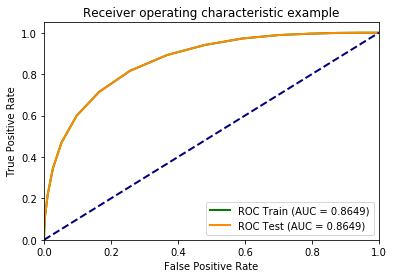

In [77]:
train_test_model(best_model_KNN, 
                 vectors_documents_subset, target_subset, 
                 vectors_documents_subset, target_subset)

### 9.2 Grid search - Naive Bayes

In [24]:
# To be implemented
from sklearn import grid_search
from sklearn.metrics import make_scorer, roc_auc_score, accuracy_score
from sklearn.metrics import precision_score, accuracy_score, recall_score, f1_score, roc_auc_score

/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [52]:
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB()

param_grid = {"alpha": [0.01, 0.1, 1, 10, 100],
              "fit_prior": [True, False]
             }

acc_scorer = make_scorer(roc_auc_score)

grid_job = grid_search.GridSearchCV(estimator = model, param_grid=param_grid, cv = 5, scoring = acc_scorer)

grid_job = grid_job.fit(vectors_train, target_train)

In [53]:
# see the results on training and testing using the tuned parameters
best_model_NB = grid_job.best_estimator_

              train      test
metrics                      
AUC        0.885737  0.887648
Accuracy   0.803462  0.804971
Precision  0.762868  0.762772
Recall     0.846302  0.847530
f1-score   0.802422  0.802921


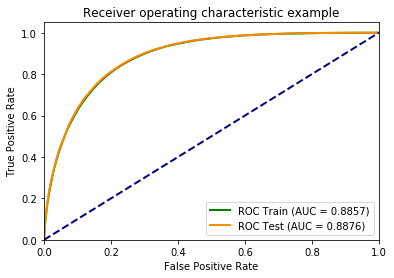

In [54]:
train_test_model(best_model_NB, 
                 vectors_train, target_train, 
                 vectors_test, target_test)

### 9.3 Grid search - Logistic Regression

In [55]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

param_grid = {"penalty": ['l1','l2'],
              "tol": [1e-3, 1e-4, 1e-5],
              "C": [0.1, 1, 10]
             }

acc_scorer = make_scorer(roc_auc_score)

grid_job = grid_search.GridSearchCV(estimator = model, param_grid=param_grid, cv = 5, scoring = acc_scorer)

grid_job = grid_job.fit(vectors_train, target_train)

In [56]:
# see the results on training
best_model_LR = grid_job.best_estimator_

              train      test
metrics                      
AUC        0.906270  0.906555
Accuracy   0.824686  0.825606
Precision  0.807842  0.807611
Recall     0.824316  0.824338
f1-score   0.815996  0.815889


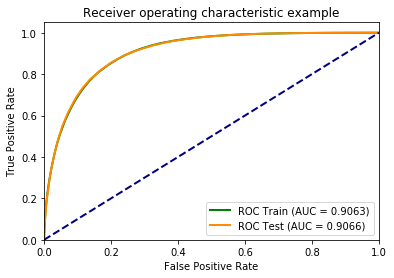

In [57]:
train_test_model(best_model_LR, 
                 vectors_train, target_train, 
                 vectors_test, target_test)

### 9.4 Randomized grid search - Random Forest
- Randomly choose 5 combination of parameters to perform grid search due to time limit
- (Reference: How to perform random grid search in sklearn)
    1. https://www.youtube.com/watch?v=Gol_qOgRqfA&frags=pl%2Cwn&ab_channel=DataSchool
    2. http://scikit-learn.org/stable/auto_examples/model_selection/plot_randomized_search.html

In [58]:
from scipy.stats import randint as sp_randint
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()

param_dist = {"n_estimators": [50,100,200],
              "max_depth": sp_randint(1, 25),
              "min_samples_leaf": sp_randint(1, 100),
              "random_state": [1]
             }

random_grid = RandomizedSearchCV(estimator = model, param_distributions=param_dist, cv = 5, scoring = 'roc_auc',
                              n_iter=5,
                             )

random_grid.fit(vectors_train, target_train)

RandomizedSearchCV(cv=5, error_score='raise',
          estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
          fit_params=None, iid=True, n_iter=5, n_jobs=1,
          param_distributions={'n_estimators': [50, 100, 200], 'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x1a26554860>, 'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x1a265540b8>, 'random_state': [1]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring='roc_auc', verbose=0)

In [59]:
print(random_grid.best_score_)
print(random_grid.best_params_)

0.8722409129573696
{'max_depth': 23, 'min_samples_leaf': 31, 'n_estimators': 200, 'random_state': 1}


In [60]:
best_model_RF = random_grid.best_estimator_

              train      test
metrics                      
AUC        0.883307  0.874510
Accuracy   0.797792  0.791314
Precision  0.792858  0.784324
Recall     0.773221  0.765235
f1-score   0.782917  0.774662


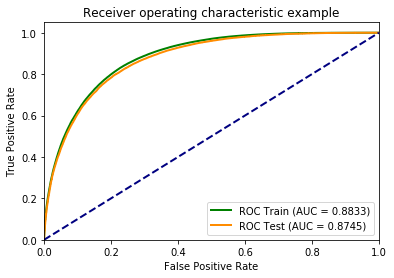

In [61]:
train_test_model(best_model_RF, 
                 vectors_train, target_train, 
                 vectors_test, target_test)

### 9.5 Model comparison 

| Model | basic_train_roc_auc | basic_test_roc_auc | grid_search_train_roc_auc | grid_search_test_roc_auc|
| ---  | --- | --- | --- |
| KNN | 0.8895 | **0.8895** | 0.8649 | 0.8649 | 
| Naive-Bayes | 0.8850 | 0.8845 | 0.8857 | **0.8876** | 
| Logistic Regression | 0.9065 | 0.9047 | 0.9063 | **0.9066** | 
| Random Forest | 0.9084 | **0.8761** | 0.8833 | 0.8745 | 


- The performance of models with grid_search are very close to those of basic models, which indicate our baisc models have already performed greatly in this dataset and hard for the models with grid_search to perform better.
    
#### Next, we will try standardization and PCA to see if we can improve the model performace.

## 10. Use PCA to reduce dimensionality
- 10.1 Stardardize features
- 10.2 Use PCA to transform data (train and test) and get princial components
- 10.3 See how much (and how much percentage of) variance the principal components explain
- 10.4 Plot proportion of variance explained with top K principal components

### 10.1 Stardardize features

In [78]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(vectors_train)
X_test_scaled = scaler.transform(vectors_test)

In [79]:
print(X_train_scaled.shape)
print(X_test_scaled.shape)

(357626, 1000)
(89407, 1000)


In [80]:
# Stardardize features for KNN
vectors_documents_subset_scaled = scaler.fit_transform(vectors_documents_subset)

### 10.2 Use PCA to transform data (train and test) and get princial components

In [81]:
from sklearn.decomposition import PCA

# Let's pick a n_components
n_components = 50

pca = PCA(n_components = n_components)

X_train_pca = pca.fit_transform(X_train_scaled)

X_test_pca = pca.transform(X_test_scaled)

In [82]:
X_train_pca.shape, X_test_pca.shape, pca.components_.shape

((357626, 50), (89407, 50), (50, 1000))

In [83]:
# Use PCA to transform data for KNN

n_components = 50

pca = PCA(n_components = n_components)

vectors_documents_subset_scaled_pca = pca.fit_transform(vectors_documents_subset_scaled)

In [84]:
vectors_documents_subset_scaled.shape

(22272, 1000)

### 10.3 See how much (and how much percentage of) variance the principal components explain

In [66]:
# 50 pca components
len(pca.explained_variance_)

50

In [67]:
# Look at the variance of top 20 pca components
print (pca.explained_variance_[:20])

[5.93858776 4.51209311 3.33715681 2.97345434 2.74485314 2.72386455
 2.59023774 2.45833772 2.33528353 2.32885235 2.27738198 2.14640238
 2.13475375 2.07113215 2.04080457 1.99860149 1.95922997 1.92130947
 1.89310583 1.87459006]


In [68]:
# Look at the ratio of variance of top 20 pca components
print (pca.explained_variance_ratio_[:20])

[0.00593857 0.00451208 0.00333715 0.00297345 0.00274485 0.00272386
 0.00259023 0.00245833 0.00233528 0.00232885 0.00227738 0.0021464
 0.00213475 0.00207113 0.0020408  0.0019986  0.00195922 0.0019213
 0.0018931  0.00187458]


In [83]:
print('In total, 50 pca components explained only',sum(pca.explained_variance_ratio_),'of total variance')

In total, 50 pca components explained only 0.09870964753559902 of total variance


### 10.4 Plot proportion of variance explained with top K principal components

For clear display, we start with plotting <=20 principal components

Text(0,0.5,'plot proportion of variance explained')

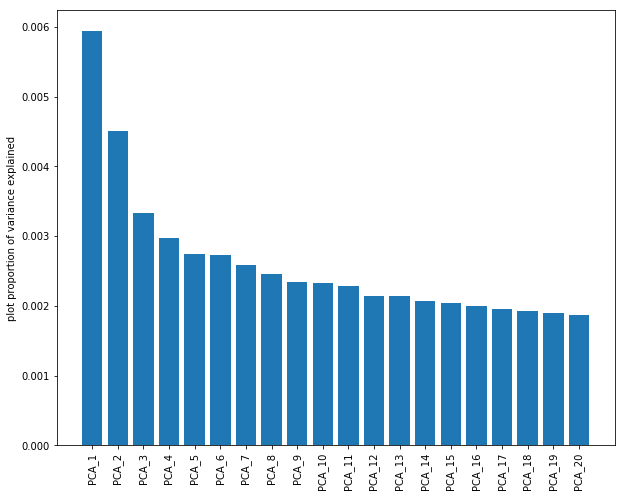

In [70]:
# Plot proportion of variance explained with top 20 principal components

n_col_to_display = 20

pca_range = np.arange(n_col_to_display) + 1
pca_name = ['PCA_%s' % i for i in pca_range]

plt.figure(figsize = (10, 8))
plt.bar(pca_range, pca.explained_variance_ratio_[:n_col_to_display])
xticks = plt.xticks(pca_range, pca_name, rotation = 90)
plt.ylabel('plot proportion of variance explained')

## 11 Classifying positive/negative review with PCA preprocessing
- 11.1 KNN
    - 11.1.1 Use standardized tf-idf vectors as features
    - 11.1.2 Use (Stardardized + PCA) tf-idf vectors as features
- 11.2 Logistic Regression Classifier
    - 11.2.1 Use standardized tf-idf vectors as features
    - 11.2.2 Use (Stardardized + PCA) tf-idf vectors as features
    - 11.2.3 Visualization: PCA components 
- 11.3 Random Forest Classifier
    - 11.3.1 Use standardized tf-idf vectors as features
    - 11.3.2 Use (Stardardized + PCA) tf-idf vectors as features
    - 11.3.3 Visualization: PCA components
- 11.4 Model comparison

### 11.1 KNN
### 11.1.1 Use standardized tf-idf vectors as features

In [85]:
model = KNeighborsClassifier()

param_grid = {
              'n_neighbors': [i for i in range(3,30,3)],
              'leaf_size': [10, 20, 30]
             }

acc_scorer = make_scorer(roc_auc_score)

grid_job = grid_search.GridSearchCV(estimator = model, param_grid = param_grid, cv = 5, scoring = acc_scorer)

grid_job = grid_job.fit(vectors_documents_subset_scaled, target_subset)

# see the results on training
best_model_KNN = grid_job.best_estimator_

In [37]:
# Get score for training set
best_model_KNN.fit(vectors_documents_subset_scaled, target_subset)

KNeighborsClassifier(algorithm='auto', leaf_size=10, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=6, p=2,
           weights='uniform')

              train      test
metrics                      
AUC        0.798243  0.798243
Accuracy   0.708019  0.708019
Precision  0.656426  0.656426
Recall     0.805608  0.805608
f1-score   0.723406  0.723406


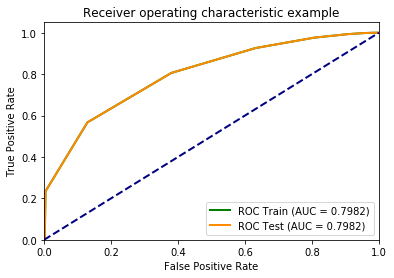

In [86]:
train_test_model(best_model_KNN, 
                 vectors_documents_subset_scaled, target_subset, 
                 vectors_documents_subset_scaled, target_subset)

### 11.1.2 Use (Stardardized + PCA) tf-idf vectors as features

In [39]:
model = KNeighborsClassifier()

param_grid = {
              'n_neighbors': [i for i in range(3,30,3)],
              'leaf_size': [10, 20, 30]
             }

acc_scorer = make_scorer(roc_auc_score)

grid_job = grid_search.GridSearchCV(estimator = model, param_grid = param_grid, cv = 5, scoring = acc_scorer)

grid_job = grid_job.fit(vectors_documents_subset_scaled_pca, target_subset)

# see the results on training
best_model_KNN = grid_job.best_estimator_

In [40]:
# Get score for training set
best_model_KNN.fit(vectors_documents_subset_scaled_pca, target_subset)

KNeighborsClassifier(algorithm='auto', leaf_size=10, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=27, p=2,
           weights='uniform')

              train      test
metrics                      
AUC        0.876066  0.876066
Accuracy   0.792122  0.792122
Precision  0.751067  0.751067
Recall     0.836232  0.836232
f1-score   0.791365  0.791365


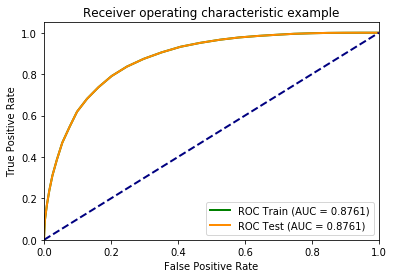

In [48]:
train_test_model(best_model_KNN, 
                 vectors_documents_subset_scaled_pca, target_subset, 
                 vectors_documents_subset_scaled_pca, target_subset)

### 11.2 Logistic Regression Classifier
### 11.2.1 Use standardized tf-idf vectors as features

              train      test
metrics                      
AUC        0.906261  0.906506
Accuracy   0.824660  0.825483
Precision  0.807600  0.807389
Recall     0.824648  0.824362
f1-score   0.816035  0.815787


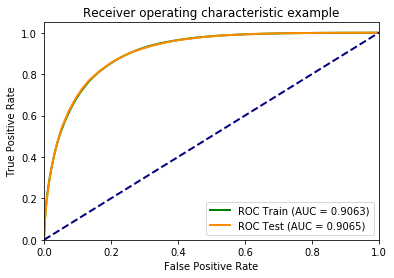

In [74]:
model = LogisticRegression()

param_grid = {"penalty": ['l1','l2'],
              "tol": [1e-3, 1e-4, 1e-5],
              "C": [0.1, 1, 10]
             }

acc_scorer = make_scorer(roc_auc_score)

grid_job = grid_search.GridSearchCV(estimator = model, param_grid=param_grid, cv = 5, scoring = acc_scorer)

grid_job = grid_job.fit(X_train_scaled, target_train)

# see the results on training
best_model_LR = grid_job.best_estimator_

train_test_model(best_model_LR, 
                 X_train_scaled, target_train, 
                 X_test_scaled, target_test)

### 11.2.2 Use (Stardardized + PCA) tf-idf vectors as features

              train      test
metrics                      
AUC        0.888536  0.890569
Accuracy   0.806572  0.809769
Precision  0.791228  0.792731
Recall     0.801244  0.804534
f1-score   0.796204  0.798588


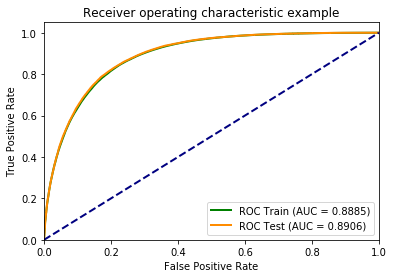

In [75]:
model = LogisticRegression()

param_grid = {"penalty": ['l1','l2'],
              "tol": [1e-3, 1e-4, 1e-5],
              "C": [0.1, 1, 10]
             }

acc_scorer = make_scorer(roc_auc_score)

grid_job = grid_search.GridSearchCV(estimator = model, param_grid=param_grid, cv = 5, scoring = acc_scorer)

grid_job = grid_job.fit(X_train_pca, target_train)

# see the results on training
best_model_LR = grid_job.best_estimator_

train_test_model(best_model_LR, 
                 X_train_pca, target_train, 
                 X_test_pca, target_test)

### 11.2.3 Visualization: PCA components 

In [76]:
pca_range = np.arange(pca.n_components_) + 1
pca_names = ['PCA_%s' % i for i in pca_range]
df_coefs = pd.DataFrame(list(zip(pca_names, model_lrc.coef_.flatten()))).sort_values(by = [1], ascending = False)
df_coefs.columns = ["PCAs", "coef"]
df_coefs[:5]

,PCAs,coef
32,PCA_33,6.407053
16,PCA_17,2.260431
31,PCA_32,1.619665
41,PCA_42,1.523816
22,PCA_23,1.310667


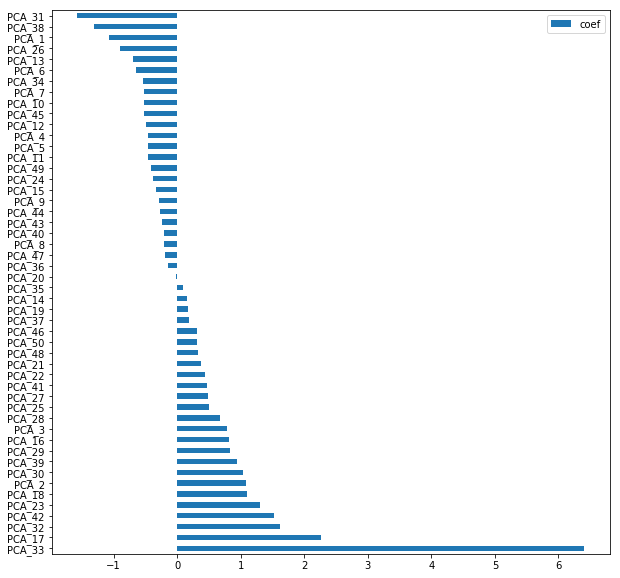

In [77]:
ax = df_coefs.plot.barh(figsize = (10, 10))
t= np.arange(pca.n_components_)
ax.set_yticks(t)
ax.set_yticklabels(df_coefs['PCAs'])
plt.show()

### 11.3 Random Forest Classifier
### 11.3.1 Use standardized tf-idf vectors as features

0.8699068692302209
{'max_depth': 23, 'min_samples_leaf': 66, 'n_estimators': 200, 'random_state': 1}
              train      test
metrics                      
AUC        0.877229  0.872150
Accuracy   0.791833  0.788272
Precision  0.787764  0.781894
Recall     0.764558  0.760439
f1-score   0.775988  0.771017


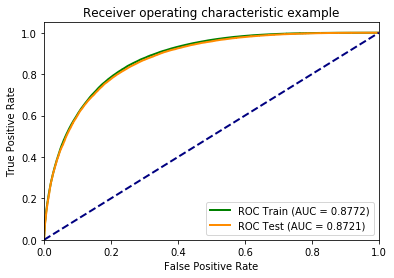

In [78]:
model = RandomForestClassifier()

param_dist = {"n_estimators": [50,100,200],
              "max_depth": sp_randint(1, 25),
              "min_samples_leaf": sp_randint(1, 100),
              "random_state": [1]
             }

random_grid = RandomizedSearchCV(estimator = model, param_distributions=param_dist, cv = 5, scoring = 'roc_auc',
                              n_iter=5,
                             )

random_grid.fit(X_train_scaled, target_train)

print(random_grid.best_score_)
print(random_grid.best_params_)

best_model_RF = random_grid.best_estimator_

train_test_model(best_model_RF, 
                 X_train_scaled, target_train, 
                 X_test_scaled, target_test)

### 11.3.2 Use (Stardardized + PCA) tf-idf vectors as features

0.881210697016237
{'max_depth': 18, 'min_samples_leaf': 16, 'n_estimators': 100, 'random_state': 1}
              train      test
metrics                      
AUC        0.948276  0.884355
Accuracy   0.871676  0.800989
Precision  0.856146  0.785105
Recall     0.874888  0.792317
f1-score   0.865415  0.788694


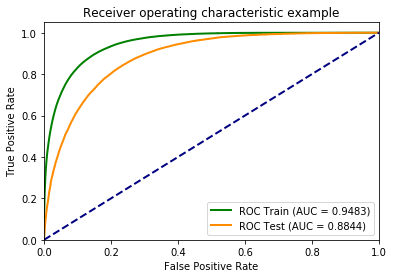

In [79]:
model = RandomForestClassifier()

param_dist = {"n_estimators": [50,100,200],
              "max_depth": sp_randint(1, 25),
              "min_samples_leaf": sp_randint(1, 100),
              "random_state": [1]
             }

random_grid = RandomizedSearchCV(estimator = model, param_distributions=param_dist, cv = 5, scoring = 'roc_auc',
                              n_iter=5,
                             )

random_grid.fit(X_train_pca, target_train)

print(random_grid.best_score_)
print(random_grid.best_params_)

best_model_RF = random_grid.best_estimator_

train_test_model(best_model_RF, 
                 X_train_pca, target_train, 
                 X_test_pca, target_test)

### 11.3.3 Visualization: PCA components

In [80]:
pca_range = np.arange(pca.n_components_) + 1
pca_names = ['PCA_%s' % i for i in pca_range]
df_coefs = pd.DataFrame(list(zip(pca_names, model_rfc.feature_importances_))).sort_values(by = [1], ascending = True)
df_coefs.columns = ["PCAs", "coef"]
df_coefs[:5]

,PCAs,coef
13,PCA_14,0.000050
14,PCA_15,0.000079
24,PCA_25,0.000083
34,PCA_35,0.000086
26,PCA_27,0.000090


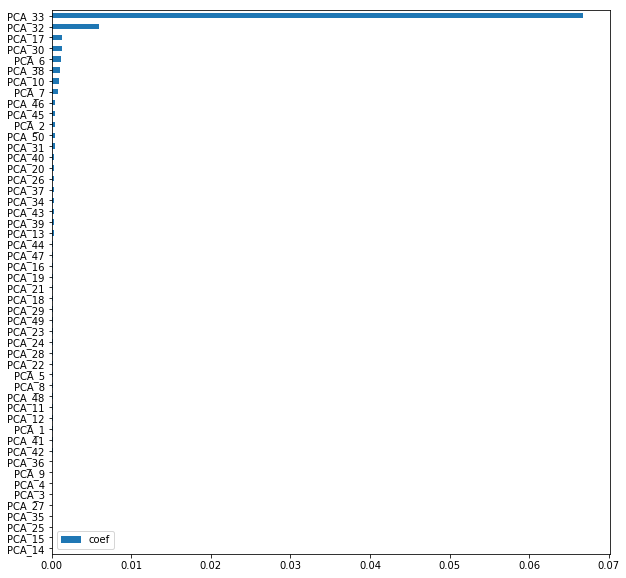

In [81]:
ax = df_coefs.plot.barh(figsize = (10, 10))
t= np.arange(pca.n_components_)
ax.set_yticks(t)
ax.set_yticklabels(df_coefs['PCAs'])
plt.show()

### 11.4 Model comparison

| Model | gs_trian_auc | gs_test_auc | std._trian_acu | std._trian_acu | std.&PCA_trian_auc | std.&PCA_test_auc |
| ---  | --- | --- | ---  | --- | --- |
| KNN | 0.8649 | **0.8649** | 0.7982 | **0.7982** | 0.8761 | **0.8761** | 
| Logistic Regression | 0.9063 | 0.9066 | 0.9063 | 0.9066 | 0.8885 | 0.8906 | 
| Random Forest | **0.8833** | **0.8745** | 0.8772 | 0.8722 | **0.9483** | **0.8844** | 

| Model | gs_trian_accuracy | gs_test_accuracy | std._trian_accuracy | std._trian_accuracy | std.&PCA_trian_accuracy | std.&PCA_test_accuracy |
| ---  | --- | --- | ---  | --- | --- |
| KNN | 0.7589 | **0.7589** | 0.7080 | **0.7080** | 0.7921 | **0.7921** | 
| Logistic Regression | 0.8247 | 0.8256 | 0.8247 | 0.8255 | 0.8066 | 0.8098 | 
| Random Forest | **0.7978** | **0.7913** | 0.7918 | 0.7883 | **0.8717** | **0.8010** | 

#### Do standardized and standardized&PCA preprocessing improve the basic model performce by comparing the AUCs and Accuracies? 
- Only perform **standardization without PCA**
    - No significant impact on performances of **Logistic Regression** and **Random Forest**.
    - Have nagetive impact on **KNN**.
        - Perhaps when we reduce the value scale of all dimensions, we reduce the value scale of distance between data points, thus, reduce the distinguish power of our model.

- Perform **standardization with PCA** 
    - No significant impact on performances of **Logistic Regression**.
        - Perhaps the previous basic **Logistic Regression** model has already performed normalization which essentially reduced feature dimensions, thus the PCA play the same role and have no impact on the model performance.
    - Improve the performance of **KNN**.
        - Before we perform PCA, our basic model may suffer from **Curse of Dimensionality** which means nearest neighbors can be 'far' in high dimension. 
        - **KNN**, or any method involving this sort of distancing, suffers majorly from **curse of dimensionality**.
        - PCA reduce feature dimensions and negative effect of **curse of dimensionality** to improve the performnce of **KNN**, especially the accuracy.
    - Have a negative impact on the overfitting issue of **Random Forest** that provides a more unstable result.
        - Different between trian_acu and test_auc become larger, which indicates overfitting and unstability.
        - The goal of the **Random Forest** is to lower down an overall variance by randomly using a portion of features to generate each tree structure seperately. Using a less number of pca components can lead to an issue that each tree structure is more likely to be the same with other trees' structures. Therefore, using a less number of pca components results in an overfitting issue.